# Window Trigger Rates

The command used to generate this notebook was: `./scanwindow -r0-12-0.05 -w71 -v3`  

Meaning that it took data from 0 MeV to 12 MeV, each bin having a width of 0.05 and taking data for 710 seconds or 11:50 minutes per bin.

This data was taken with the PuBe source.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data
dataPuBe = pd.read_csv ("~/packages/R76-Firmware/library/C/lib/out.csv")
thslPuBe = dataPuBe.iloc[:,0]
thsuPuBe = dataPuBe.iloc[:,1]
ratePuBe = dataPuBe.iloc[:,2]

thrsPuBe = [x + 0.05/2 for x in thslPuBe]

#Cut an ill-behaved region
#ratePuBe = ratePuBe[thrsPuBe > 220]
#thrsPuBe = thrsPuBe[thrsPuBe > 220]

del dataPuBe

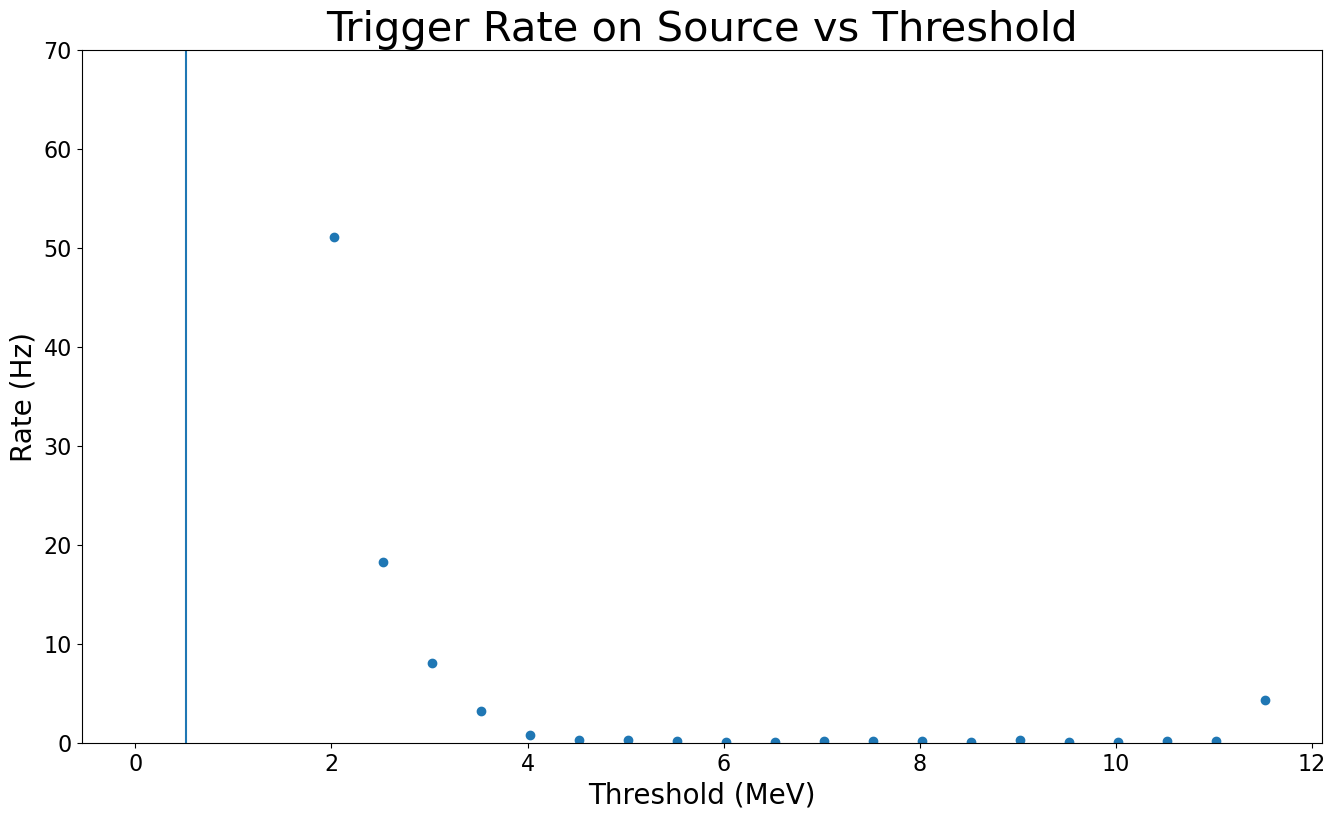

Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.05 MeV.


In [11]:
plt.figure(figsize=(16,9))

plt.scatter(thrsPuBe,ratePuBe,label="Data")

plt.xlabel("Threshold (MeV)",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Source vs Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.yscale('log')
#plt.xlim(150)
plt.axvline(0.511)
"""
plt.text(0.6,400,"0.511 MeV")
plt.axvline(1.274)
plt.text(1.3,350,"1.274 MeV")
plt.axvline(1.400)
plt.text(1.500,300,"1.400 MeV")
plt.axvline(2.100)
plt.text(2.200,250,"2.100 MeV")
plt.axvline(2.615)
plt.text(2.7,200,"2.615 MeV")
"""
plt.ylim(0,70)#700)

#plt.legend()
plt.show()
print("Note: threshold refers to average of upper and lower thresholds; in this case, the lower threshold + 0.05 MeV.")

In [4]:
print(ratePuBe) #Check how much is actually exactly 0.

0     475564.500000
1      82346.046875
2        217.860016
3        116.740005
4         51.079998
5         18.260000
6          8.020000
7          3.240000
8          0.820000
9          0.300000
10         0.320000
11         0.180000
12         0.120000
13         0.120000
14         0.140000
15         0.160000
16         0.220000
17         0.120000
18         0.240000
19         0.060000
20         0.100000
21         0.200000
22         0.160000
23         4.300000
Name:  rate (Hz), dtype: float64


In [5]:
for i,x in enumerate(thslPuBe):
    print(i, x, thsuPuBe[i])

0 0.0 0.5
1 0.5 1.0
2 1.0 1.5
3 1.5 2.0
4 2.0 2.5
5 2.5 3.0
6 3.0 3.5
7 3.5 4.0
8 4.0 4.5
9 4.5 5.0
10 5.0 5.5
11 5.5 6.0
12 6.0 6.5
13 6.5 7.0
14 7.0 7.5
15 7.5 8.0
16 8.0 8.5
17 8.5 9.0
18 9.0 9.5
19 9.5 10.0
20 10.0 10.5
21 10.5 11.0
22 11.0 11.5
23 11.5 12.0
